## About the Project

####  This project makes use of ANN( Artificial Neural Network) of predict the memory test when under certian medication. The data is based on the experiment of anti-anxiety medicine on memory recall when being primed with happy and sad memories. The drugs that are used are ( Alprazolam (label =A)), (Triazolam)(label= T), (Sugar Tablet)(label = S). The label for happy and sad memores are ( S for sadness) and (H for happyness). The participants were from various age and were given various doses of drug. 
#### The project has a correlation chart that gives good idea about the relationship between age and testscore, effect of medication on test socre and its effectiveness

#### Source of data: http://www.jstor.org/stable/43854146, https://www.sciencedirect.com/science/article/pii/S0896627314008484,
#### http://www.jstor.org/stable/40064315

# 1 Imports

In [214]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# neural network imports
import keras

from keras.models import Sequential

from keras.layers import Dense

from sklearn.metrics import confusion_matrix

from keras.callbacks import TensorBoard
from time import strftime


from sklearn.metrics import mean_squared_error

from sklearn.metrics import confusion_matrix

In [215]:
# Creating a folder of tensorboard performace logs

LOG_DIR='tensorboard_logs/'

# 2 Cleaning our data

In [216]:
org_data=pd.read_csv("Islander_data.csv")

In [217]:
# Viewing the first 5 rows of our original data
org_data[:5]

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


## 2.1 Converting expressions and drugs into a dummy variable

In [218]:
# converting happy_sad_gropy and Drug to a dummy variable
# This is really important step as we don't want the srting or variable 1, 2 or 3 to affect our prediction
dummy_Hap_Sad=pd.get_dummies(org_data['Happy_Sad_group'])
dummy_Drug=pd.get_dummies(org_data['Drug'])

# concating the dummy variable to our original data
new_org_data=pd.concat([dummy_Hap_Sad,dummy_Drug,org_data], axis=1)
new_org_data.head()

,H,S,A,S,T,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,1,0,1,0,0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,0,1,1,0,0,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,1,0,1,0,0,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,0,1,1,0,0,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,1,0,1,0,0,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [219]:
# Removing first and last name as it doesn't play any role in data prediction
# Also removing Drug and happy_sad gorup as they have been converted to a dummy variable
# we are also removing the drug and happy sad grop 
features=new_org_data.drop(['first_name','last_name','Mem_Score_After','Diff','Drug','Happy_Sad_group'], axis=1)
target=new_org_data['Mem_Score_After']

In [220]:
features.head()

,H,S,A,S,T,age,Dosage,Mem_Score_Before
0,1,0,1,0,0,25,1,63.5
1,0,1,1,0,0,52,1,41.6
2,1,0,1,0,0,29,1,59.7
3,0,1,1,0,0,50,1,51.7
4,1,0,1,0,0,52,1,47.0


In [221]:
# This is the coulumn we are going to predict so its named target
target.head()

0    61.2
1    40.7
2    55.1
3    51.2
4    47.1
Name: Mem_Score_After, dtype: float64

In [222]:
# the description of our feature data
features.describe()

,H,S,A,S,T,age,Dosage,Mem_Score_Before
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,0.500000,0.500000,0.338384,0.333333,0.328283,39.530303,1.989899,57.967677
std,0.501267,0.501267,0.474359,0.472599,0.470779,12.023099,0.818504,15.766007
min,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,27.200000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,46.525000
50%,0.500000,0.500000,0.000000,0.000000,0.000000,37.000000,2.000000,54.800000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000,3.000000,68.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,83.000000,3.000000,110.000000


# 3 Visualizing data

## 3.1 Visualizing data using Correlation

In [223]:
# finding the correlation between all our features 
# we concat both features and mean score after to find correlatin between all our data

filtered_all_data=pd.concat([features,target], axis=1)
filtered_all_data.head()

,H,S,A,S,T,age,Dosage,Mem_Score_Before,Mem_Score_After
0,1,0,1,0,0,25,1,63.5,61.2
1,0,1,1,0,0,52,1,41.6,40.7
2,1,0,1,0,0,29,1,59.7,55.1
3,0,1,1,0,0,50,1,51.7,51.2
4,1,0,1,0,0,52,1,47.0,47.1


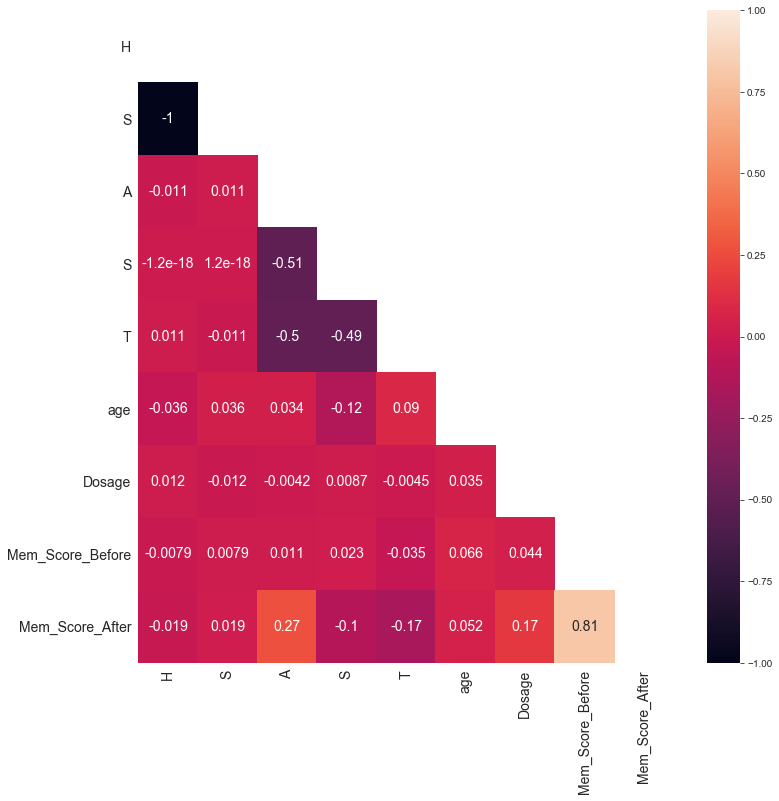

In [224]:
# now we find correlation using heat map
# we know that the uppertrange of the correlation table is the same as lower traiange so we get rid of them using mask

mask=np.zeros_like(filtered_all_data.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]= True

#one our mask is all set
#we find the correlation and plot it into a head map
plt.figure(figsize=[12,12])
sns.heatmap(filtered_all_data.corr(), mask=mask, annot=True, annot_kws= {"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Skew Distribution 

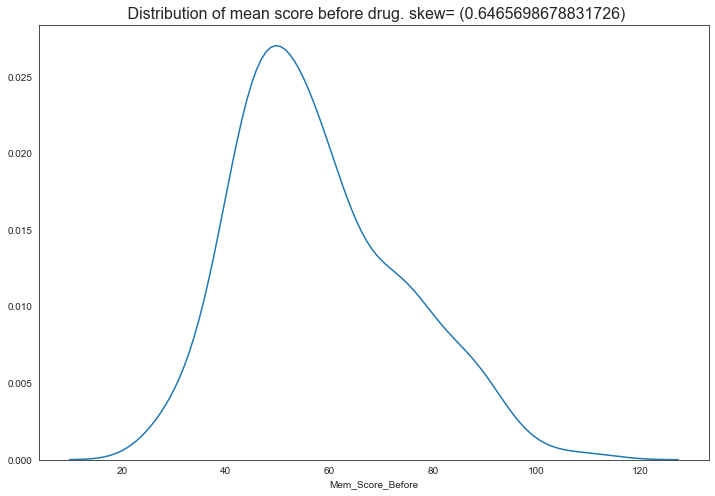

In [225]:
# skew of mean score before distribution
# we got a positve skew and most of the score was distributed around 45-50
plt.figure(figsize=[12,8])
plt.title(f" Distribution of mean score before drug. skew= ({new_org_data['Mem_Score_Before'].skew()})", fontsize=16)
sns.distplot(new_org_data['Mem_Score_Before'], hist=False)

plt.show()

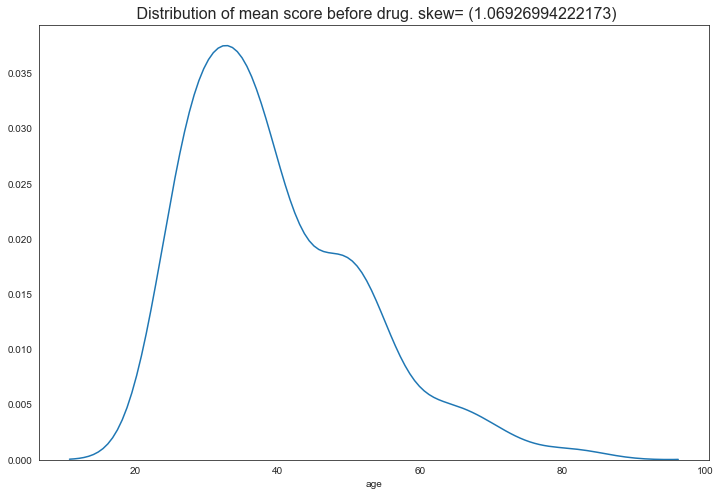

In [226]:
# skew of age
plt.figure(figsize=[12,8])
plt.title(f" Distribution of mean score before drug. skew= ({new_org_data['age'].skew()})", fontsize=16)
sns.distplot(new_org_data['age'], hist=False)

plt.show()

# 4 Dividing trainining and testing data

In [227]:
# This is a important phase where our data is divided into a training and testing data
# It is divided in a ration of 8:2 where 8 is training data and 2 is testing data
# we are using the training data to pass in our neural network
# the test data will be used to comapre the prediction that we got form our neural network
x_train, x_test, y_train, y_test= train_test_split(features,target, test_size=0.2)

In [228]:
# comparign our training dataset to a array as our neural network doesn't take dataframe
x_train=np.array(x_train)
y_train=np.array(y_train)


In [229]:
# Feature scaling
# Feature scaling is really important as it helps to minimize the gap between data
# it also enhances our calculation 
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
x_train[:5]


array([[-0.96271972,  0.96271972, -0.6704784 ,  1.36847626, -0.72057669,
         0.02358517, -1.23073865,  0.31697849],
       [-0.96271972,  0.96271972, -0.6704784 , -0.73073975,  1.38777733,
        -0.14579926,  0.0078391 , -0.95376454],
       [ 1.03872391, -1.03872391, -0.6704784 ,  1.36847626, -0.72057669,
        -0.823337  , -1.23073865,  0.08070968],
       [-0.96271972,  0.96271972,  1.49147236, -0.73073975, -0.72057669,
         0.36235405, -1.23073865,  1.01939925],
       [-0.96271972,  0.96271972, -0.6704784 , -0.73073975,  1.38777733,
         1.97150618,  1.24641685,  0.56601858]])

# 5 Using ANN 

## 5.1 Initializing ANN

In [230]:
# classifiying our model
model=Sequential()

In [231]:
# Adding different layers in our ANN
# init= where we want to start and it should be uniform. Usually start between 0-1
#our first layer
model.add(Dense(output_dim=128,activation='relu', input_dim=8))

#our second layer
model.add(Dense(output_dim=64, activation='relu'))

#our third layer
model.add(Dense(output_dim=32, activation='relu'))


#our output layer
model.add(Dense(output_dim=1, activation='linear'))

C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=8, units=128)`
  after removing the cwd from sys.path.
C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  import sys
C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


## 5.2 Compiling and Predicting the ANN

In [232]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


# 5.2 Using Tensor Board
### Helps us visualize the training process

In [233]:
def get_tensorboard(model_name):
    folder_name=f'{model_name} at {strftime("%H %M")}'
    
    dir_path=os.path.join(LOG_DIR,folder_name)
    try:
        os.makedirs(dir_path)
    except osError as err:
        print(err.stererror)
    else:
        print(" Successfully created directiory")
    return TensorBoard(log_dir=dir_path)

## 5.3 Training the data

In [280]:
# predicting our ANN
# xtrain and y train must be a list so convert it
#we have epoch of 1500 i.e it will pass batch size of 32 1500 times
# the data will stored in model 1 to see visulaize in tensor board
model.fit(x_train,y_train, batch_size=32, nb_epoch=3500, validation_split=0.2, callbacks=[get_tensorboard('Model 1')])

#saving our model
model.save("model_test_score.h5")

 Successfully created directiory
Train on 126 samples, validate on 32 samples


C:\Users\aayus\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/3500
126/126 [==============================] - 0s 71us/step - loss: 0.9679 - mae: 0.6440 - mse: 0.9679 - val_loss: 243.8004 - val_mae: 12.1794 - val_mse: 243.8004
Epoch 2/3500
126/126 [==============================] - 0s 111us/step - loss: 0.6896 - mae: 0.5797 - mse: 0.6896 - val_loss: 241.7766 - val_mae: 12.0701 - val_mse: 241.7766
Epoch 3/3500
126/126 [==============================] - 0s 111us/step - loss: 0.5031 - mae: 0.4719 - mse: 0.5031 - val_loss: 248.5820 - val_mae: 12.1685 - val_mse: 248.5820
Epoch 4/3500
126/126 [==============================] - 0s 166us/step - loss: 0.6888 - mae: 0.4986 - mse: 0.6888 - val_loss: 243.3202 - val_mae: 12.1184 - val_mse: 243.3202
Epoch 5/3500
126/126 [==============================] - 0s 55us/step - loss: 0.6624 - mae: 0.5148 - mse: 0.6624 - val_loss: 243.8953 - val_mae: 12.1468 - val_mse: 243.8953
Epoch 6/3500
126/126 [==============================] - 0s 55us/step - loss: 0.6069 - mae: 0.4872 - mse: 0.6069 - val_loss: 246.3013 - va

# 5.4 predicting the test data using our model

In [283]:
#loading our model
model= keras.models.load_model("model_test_score.h5")

#predicting the model using our testing data
#Predicing entire test data
prediction=model.predict(x_test)
prediction[:5]

array([[104.32881 ],
       [ 78.875374],
       [ 83.506584],
       [ 85.72881 ],
       [ 59.40713 ]], dtype=float32)

In [284]:
y_test[:5]

189    82.6
127    58.9
67     73.3
11     63.7
162    54.6
Name: Mem_Score_After, dtype: float64

# 5.5 Comaring predicted data with actual data

In [285]:
# comparing our actual test score vs predicted score of x_test data
predict_vs_actual=pd.DataFrame(prediction, y_test, columns=["PREDICTED_SCORE"])
print(predict_vs_actual)

                 PREDICTED_SCORE
Mem_Score_After                 
82.6                  104.328812
58.9                   78.875374
73.3                   83.506584
63.7                   85.728813
54.6                   59.407131
39.0                   31.389380
65.2                   98.168259
66.6                   46.347561
56.1                   59.365570
32.8                   84.556358
61.5                   68.329018
47.0                   44.157715
90.0                   68.416389
47.1                   39.904900
44.2                   40.280529
38.2                   33.565891
60.8                   57.712635
40.3                   13.526177
44.1                   49.982922
63.0                   50.150425
40.7                   34.634052
83.6                  101.272148
44.5                   22.682634
55.5                   34.886753
63.6                   78.630508
49.2                   34.084431
56.0                   68.687828
90.0                  113.626198
59.2      

In [286]:
#single test row
x_test[1:2]


array([[ 0.85972695, -0.85972695, -0.90453403,  1.62368828, -0.61588176,
         0.491325  ,  1.20432067,  0.02436952]])

In [287]:
#passing in a single data
prediction=model.predict(x_test[1:2])
print(prediction)

[[78.87537]]


# Building a costom data function


In [288]:
our_stats=np.zeros((1, 8))

def score_predictor(status, Drug, age, dosage, score_before):
    if status=='H':
        our_stats[0][0]=1
    else:
        our_stats[0][1]=1
    if Drug=='A':
        our_stats[0][2]=1
    elif Drug=='S':
        our_stats[0][3]=1
    else:
        our_stats[0][4]=1
        
        #updating our last 3 elements
    our_stats[:,5:]=[age,dosage,score_before]

    return sc.transform(our_stats)

In [291]:
#our manual data
new_stats=score_predictor('H','A',30,1,70.3)
#our model Before prediction
print(new_stats)


[[ 0.85972695 -0.85972695  1.1055416  -0.61588176 -0.61588176 -0.69259066
  -1.14557332  0.86708333]]


In [292]:
new_prediction=model.predict(new_stats)
print(new_prediction)

[[60.696754]]
